<a href="https://colab.research.google.com/github/Maximalord/Aerofit-Case-Study-EDA-Customer-Profiling-/blob/main/%20File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AeroFit Treadmill Customer Profiling & Probability Analysis

This notebook performs the complete analysis requested in the case study:
- Data import, structure, types, basic stats
- Missing values & outlier checks (boxplots; mean vs median)
- Univariate & bivariate visual analysis (matplotlib only)
- Two-way contingency tables; marginal & conditional probabilities
- Correlation heatmap & scatter matrix
- Customer profiling (rules-of-thumb bins)
- Action-ready business recommendations (plain English)

## 1) Imports, Load & Inspect Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('aerofit_treadmill.csv')
print(df.shape)
print(list(df.columns))
print(df.dtypes)

df.head(5)
df.tail(5)

(180, 9)
['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


## 2) Basic checks, type and summary

In [25]:
# Convert appropriate columns to categorical
cat_cl = ["Product","Gender","MaritalStatus"]
for c in cat_cl:
  df[c] = df[c].astype("category")

# Ensure numeric columns are numeric
num_cl = ["Age","Education","Usage","Income","Fitness","Miles"]
for c in num_cl:
  df[c] = pd.to_numeric(df[c], errors ="coerce")

for c in cat_cl:
  print(f"\n{c} counts:")
  print(df[c].value_counts())


#summary
print("Dtypes:\n",df.dtypes)
display(df[num_cl].describe().T)


Product counts:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender counts:
Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus counts:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
Dtypes:
 Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


##3) Missing Values

In [26]:
df.isna().sum().to_frame("Missing")

,Missing
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


## 4) Outliers check (Boxplots, Mean vs median)

 mean vs Median (numeric columns):


,mean,median,diff mean vs median
Income,53719.577778,50596.5,3123.077778
Miles,103.194444,94.0,9.194444
Age,28.788889,26.0,2.788889
Usage,3.455556,3.0,0.455556
Education,15.572222,16.0,0.427778
Fitness,3.311111,3.0,0.311111


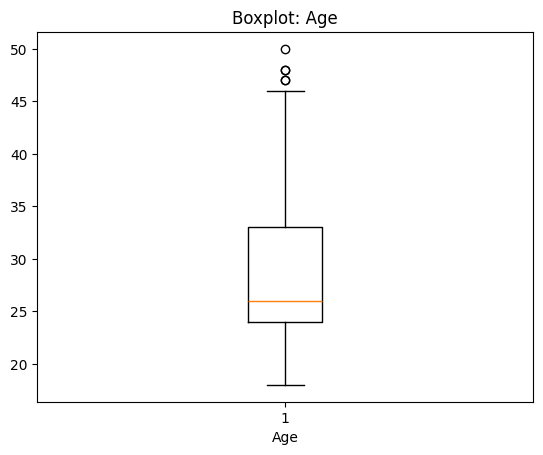

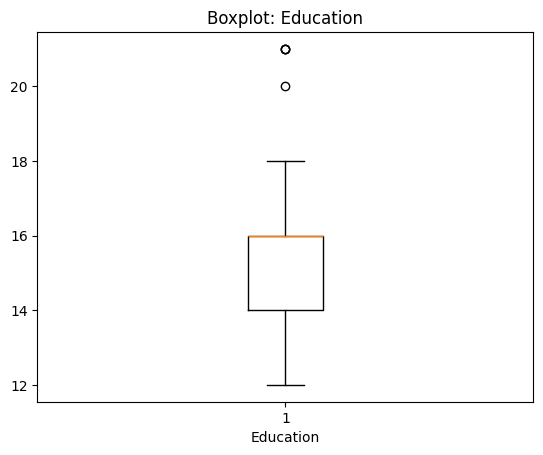

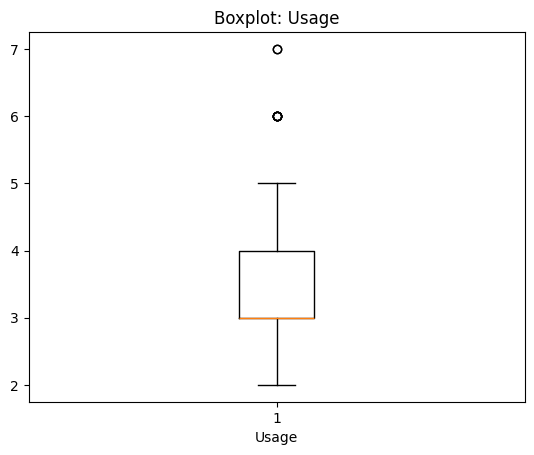

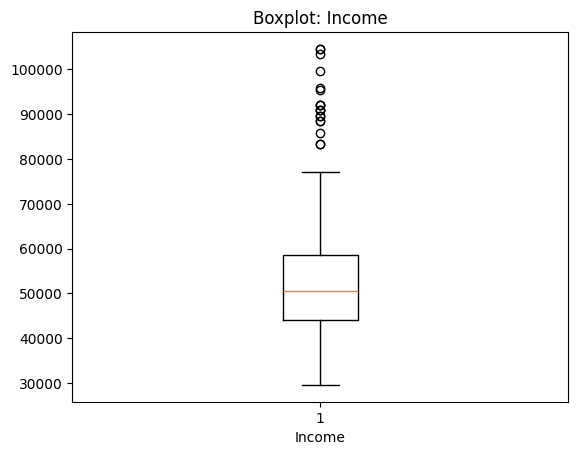

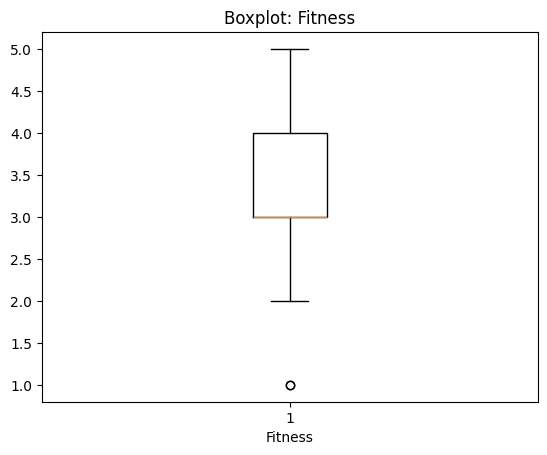

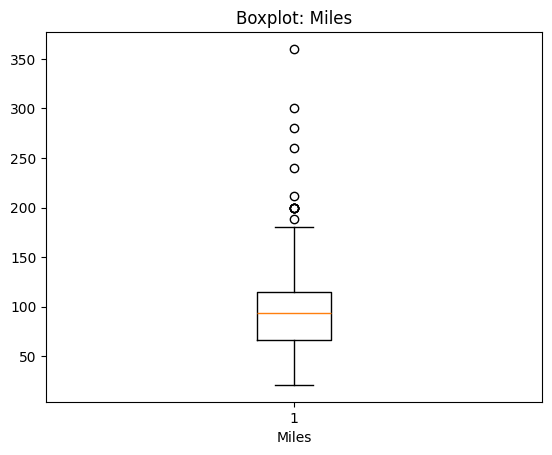

In [27]:
for c in num_cl:
  plt.figure()
  plt.boxplot(df[c])
  plt.title(f"Boxplot: {c}")
  plt.xlabel(c)
  plt.show

print (" mean vs Median (numeric columns):")
summary= pd.DataFrame({
    "mean" : df[num_cl].mean(),
    "median" : df[num_cl].median()
})
summary["diff mean vs median"] = (summary['mean'] - summary['median']).abs()
display(summary.sort_values(by = 'diff mean vs median', ascending = False))

##5) Univariate analysis(Matpltlib)

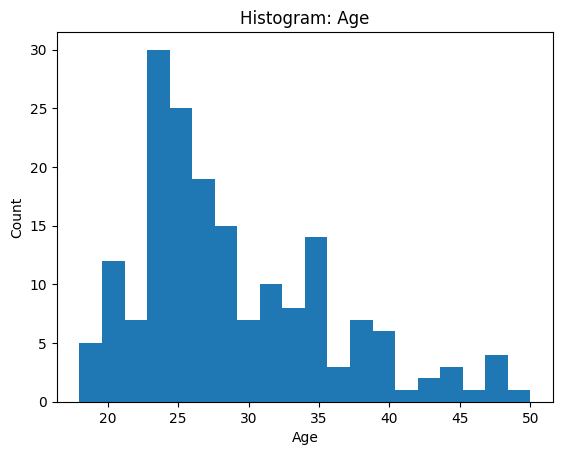

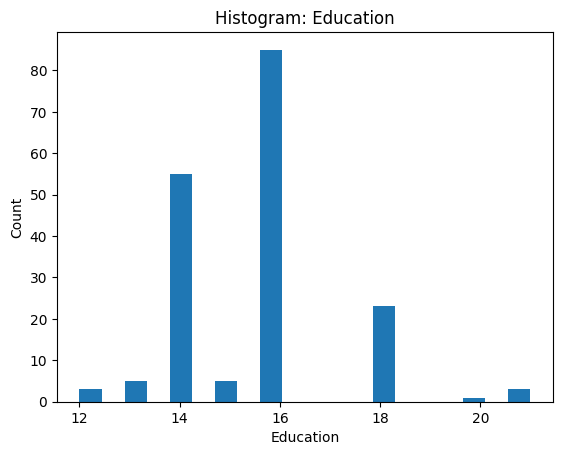

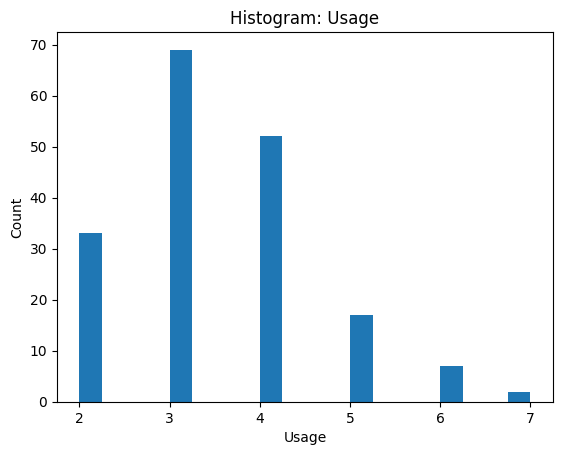

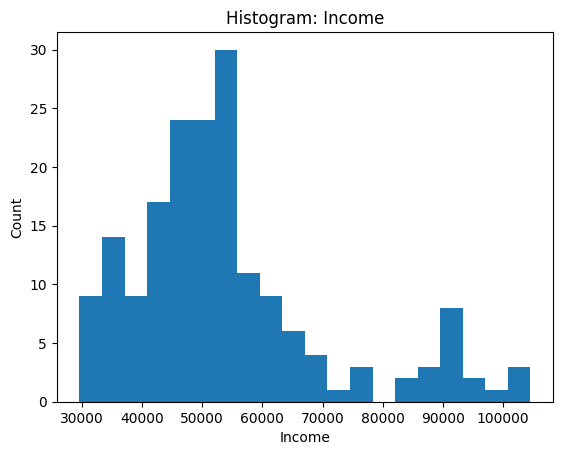

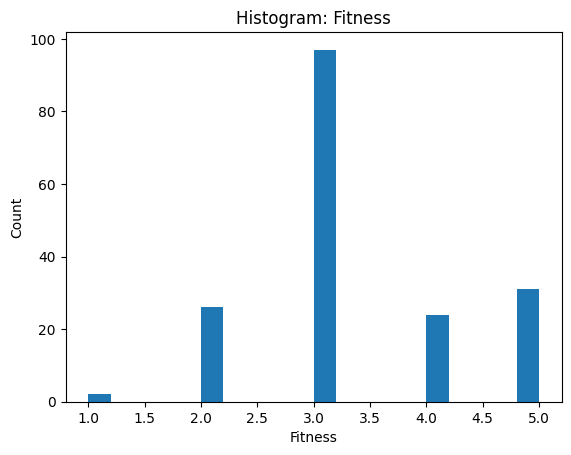

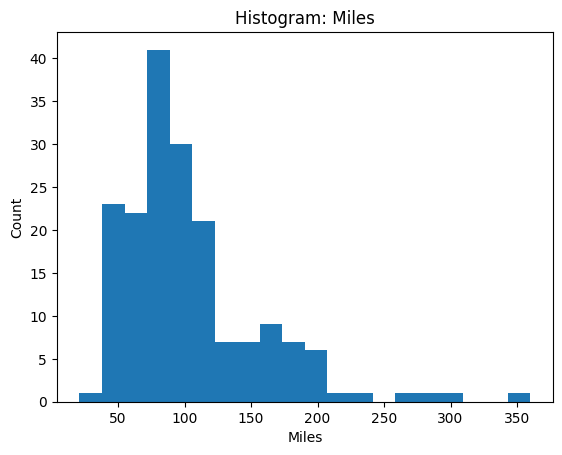

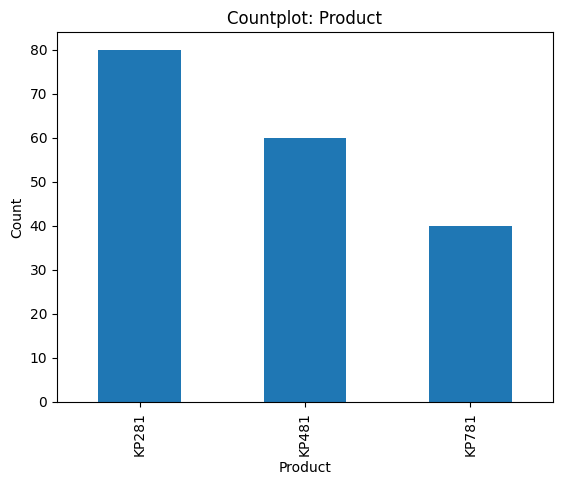

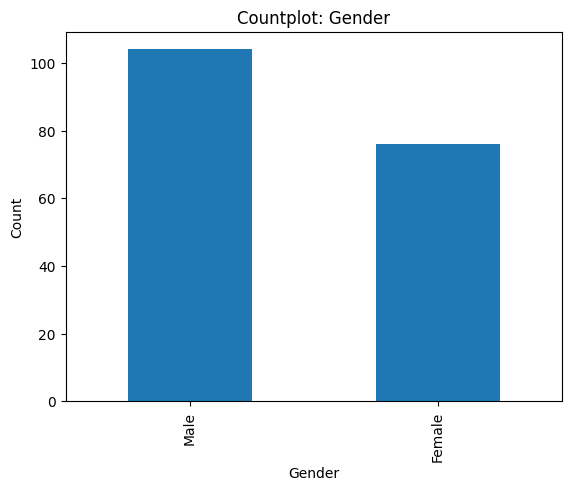

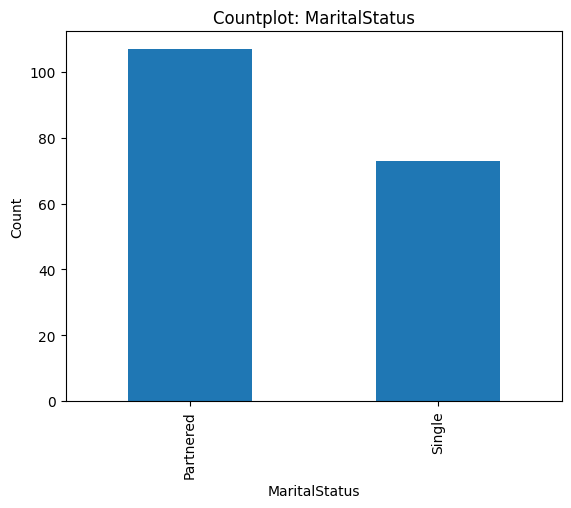

In [28]:
#Histograms
for c in num_cl:
  plt.figure()
  plt.hist(df[c],bins=20)
  plt.title(f"Histogram: {c}")
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.show()

#countplots
for c in cat_cl:
  counts = df[c].value_counts()
  plt.figure()
  counts.plot(kind="bar")
  plt.title(f"Countplot: {c}")
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.show()


##6) Bivariate Anysis (Categorical vs numerical)

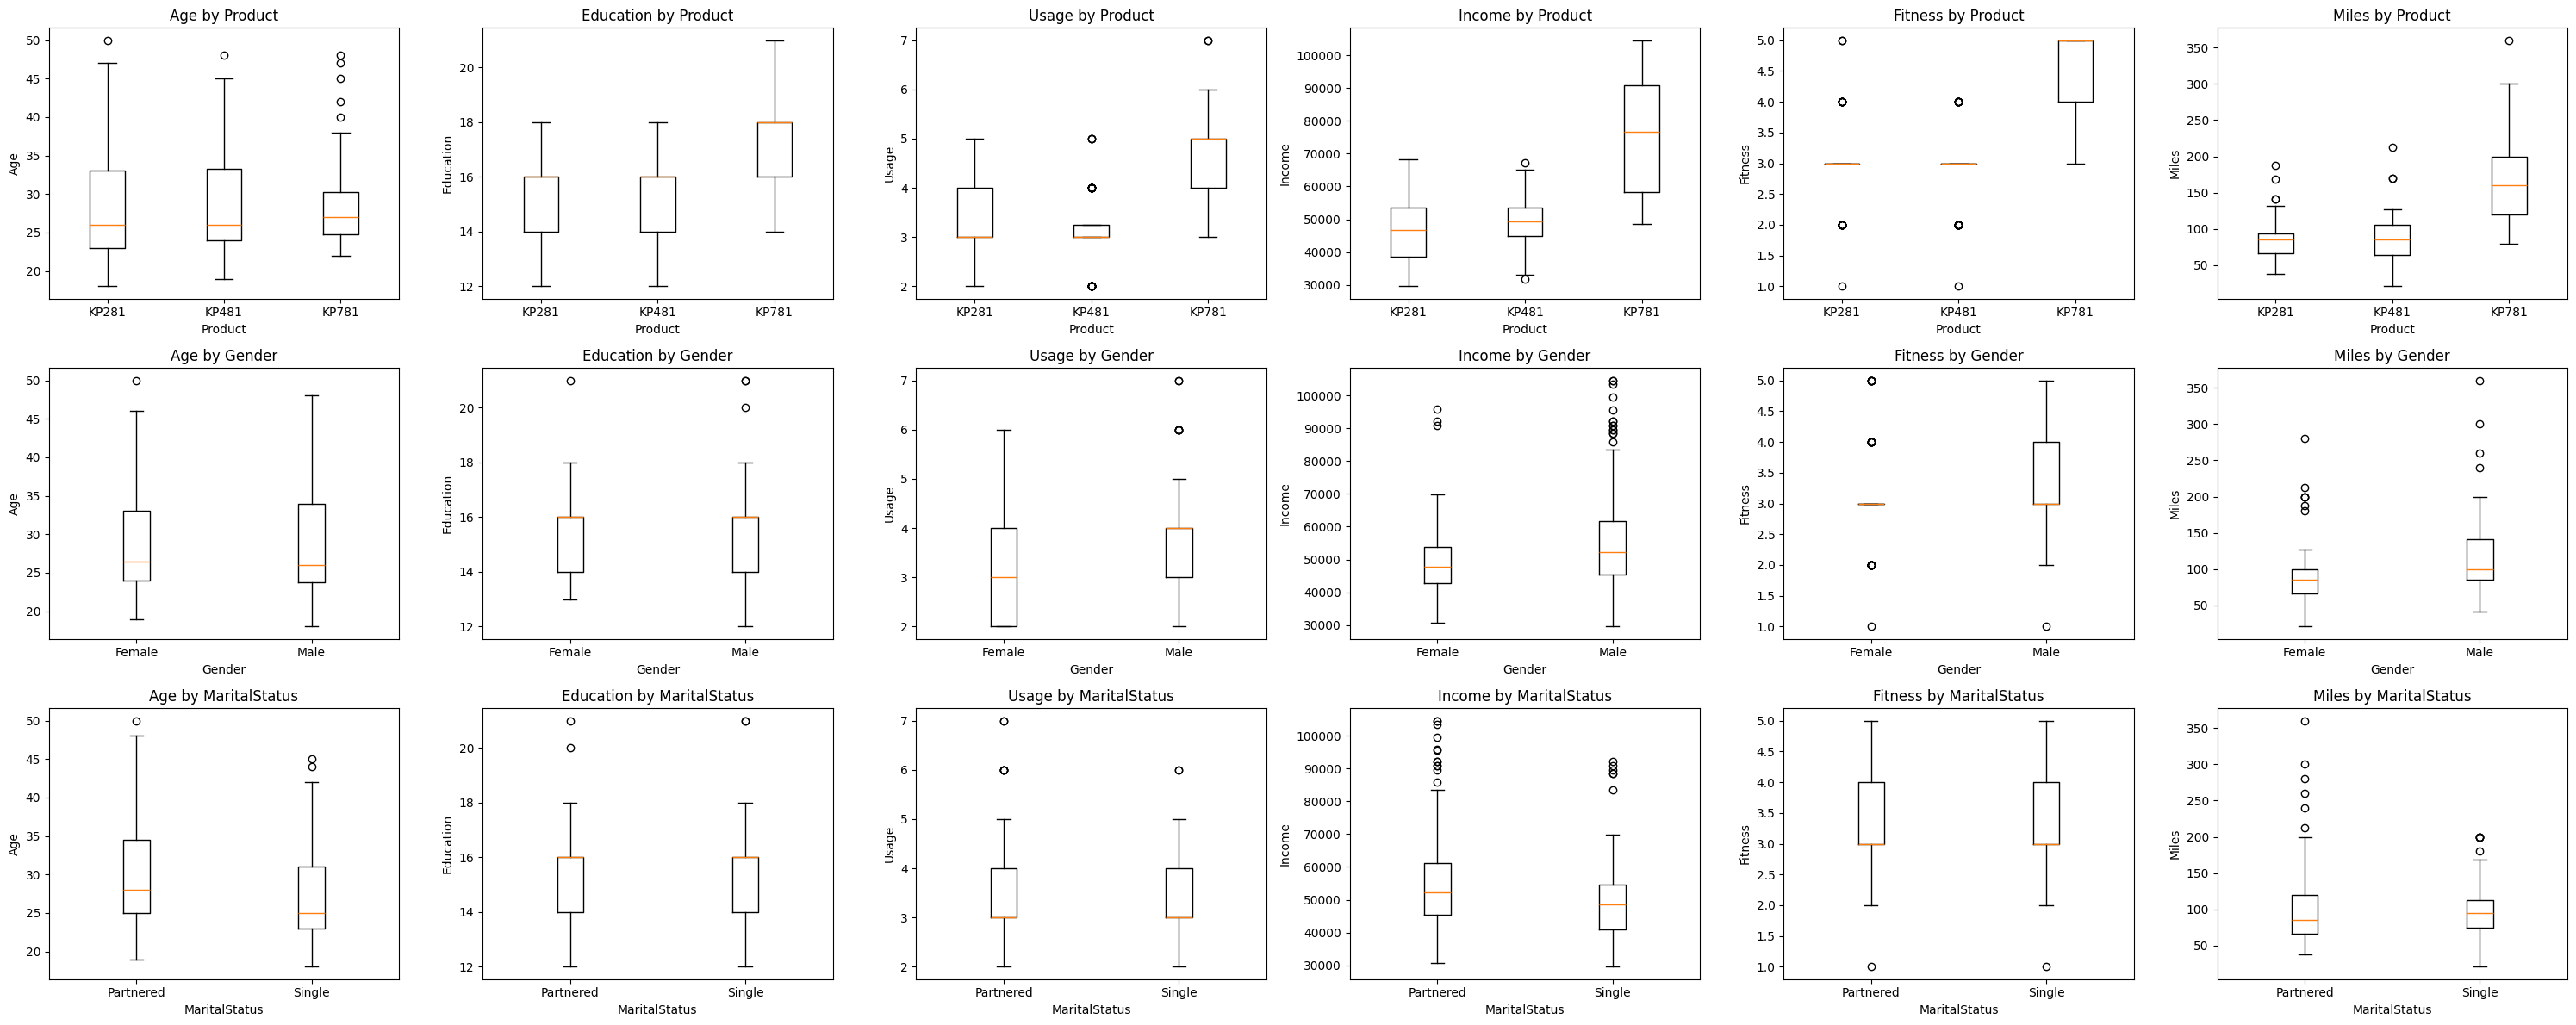

In [29]:
n_rows = len(cat_cl)
n_cols = len(num_cl)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4* n_rows), squeeze= False)

for i, cat in enumerate(cat_cl):
  for j, num in enumerate(num_cl):
    ax = axes[i , j]
    groups = [df.loc[df[cat]==k, num] for k in df[cat].cat.categories]
    ax.boxplot(groups, tick_labels=[str(k) for k in df[cat].cat.categories])
    ax.set_title(f"{num} by {cat}")
    ax.set_xlabel(cat)
    ax.set_ylabel(num)

plt.tight_layout()
plt.show()



##7) Two way contigency tables & probabilities

In [30]:
## 7) Two-way Contingency Tables & Probabilities

def contingency_with_probs(a, b, data):
    ct = pd.crosstab(data[a], data[b])
    total = ct.values.sum()

    # probabilities
    joint = ct / total
    marg_a = ct.sum(axis=1) / total
    marg_b = ct.sum(axis=0) / total
    cond_a_given_b = ct.div(ct.sum(axis=0), axis=1)  # P(a|b)
    cond_b_given_a = ct.div(ct.sum(axis=1), axis=0)  # P(b|a)

    return ct, joint, marg_a, marg_b, cond_a_given_b, cond_b_given_a


# Build pairs dynamically
pairs = []
if {"Product", "Gender"}.issubset(df.columns):
    pairs.append(("Gender", "Product"))
if {"Product", "MaritalStatus"}.issubset(df.columns):
    pairs.append(("MaritalStatus", "Product"))
if {"Product", "Fitness"}.issubset(df.columns):
    df["Fitness_bin"] = df["Fitness"].astype("category")
    pairs.append(("Fitness_bin", "Product"))
if {"Product", "Age"}.issubset(df.columns):
    df["Age_bin"] = pd.cut(df["Age"], bins=[0,25,35,50,100],
                           labels=["<=25","26-35","36-50","50+"])
    pairs.append(("Age_bin", "Product"))

# Generate results
results = {}
for a, b in pairs:
    ct, joint, marg_a, marg_b, pab, pba = contingency_with_probs(a, b, df)
    results[(a, b)] = {
        "count": ct,
        "joint": joint,
        "marg_a": marg_a,
        "marg_b": marg_b,
        "P(a|b)": pab,
        "P(b|a)": pba
    }

    print(f"\n=== {a} vs {b} ===")
    display(ct)
    display(joint.round(3))
    display(marg_a.round(3).to_frame("P"))
    display(marg_b.round(3).to_frame("P"))
    display(pab.round(3))
    display(pba.round(3))



=== Gender vs Product ===


Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


Product,KP281,KP481,KP781
Gender,,,
Female,0.222,0.161,0.039
Male,0.222,0.172,0.183


,P
Gender,
Female,0.422
Male,0.578


,P
Product,
KP281,0.444
KP481,0.333
KP781,0.222


Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.483,0.175
Male,0.5,0.517,0.825


Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317



=== MaritalStatus vs Product ===


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.267,0.200,0.128
Single,0.178,0.133,0.094


,P
MaritalStatus,
Partnered,0.594
Single,0.406


,P
Product,
KP281,0.444
KP481,0.333
KP781,0.222


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.6,0.6,0.575
Single,0.4,0.4,0.425


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.449,0.336,0.215
Single,0.438,0.329,0.233



=== Fitness_bin vs Product ===


Product,KP281,KP481,KP781
Fitness_bin,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


Product,KP281,KP481,KP781
Fitness_bin,,,
1,0.006,0.006,0.000
2,0.078,0.067,0.000
3,0.300,0.217,0.022
4,0.050,0.044,0.039
5,0.011,0.000,0.161


,P
Fitness_bin,
1,0.011
2,0.144
3,0.539
4,0.133
5,0.172


,P
Product,
KP281,0.444
KP481,0.333
KP781,0.222


Product,KP281,KP481,KP781
Fitness_bin,,,
1,0.012,0.017,0.000
2,0.175,0.200,0.000
3,0.675,0.650,0.100
4,0.112,0.133,0.175
5,0.025,0.000,0.725


Product,KP281,KP481,KP781
Fitness_bin,,,
1,0.500,0.500,0.000
2,0.538,0.462,0.000
3,0.557,0.402,0.041
4,0.375,0.333,0.292
5,0.065,0.000,0.935



=== Age_bin vs Product ===


Product,KP281,KP481,KP781
Age_bin,,,
<=25,34,28,17
26-35,32,24,17
36-50,14,8,6


Product,KP281,KP481,KP781
Age_bin,,,
<=25,0.189,0.156,0.094
26-35,0.178,0.133,0.094
36-50,0.078,0.044,0.033


,P
Age_bin,
<=25,0.439
26-35,0.406
36-50,0.156


,P
Product,
KP281,0.444
KP481,0.333
KP781,0.222


Product,KP281,KP481,KP781
Age_bin,,,
<=25,0.425,0.467,0.425
26-35,0.400,0.400,0.425
36-50,0.175,0.133,0.150


Product,KP281,KP481,KP781
Age_bin,,,
<=25,0.430,0.354,0.215
26-35,0.438,0.329,0.233
36-50,0.500,0.286,0.214


,Count,Share
Product,,
KP281,80,0.444444
KP481,60,0.333333
KP781,40,0.222222


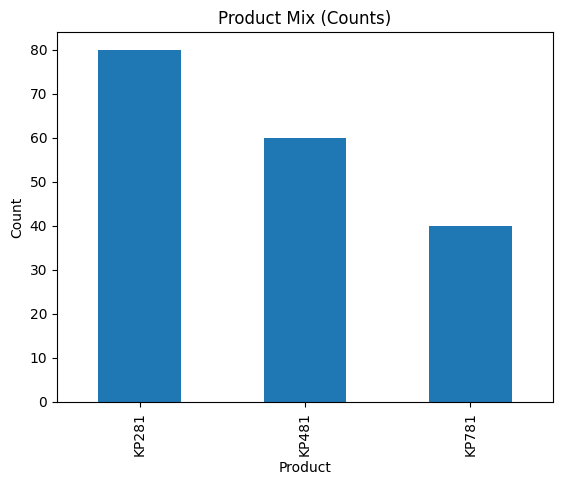

In [31]:
## 8) Marginal Product Distribution

prod_counts = df["Product"].value_counts()
prod_share = (prod_counts / prod_counts.sum()).rename("Share")
display(pd.concat([prod_counts.rename("Count"), prod_share], axis=1))
plt.figure()
prod_counts.plot(kind="bar")
plt.title("Product Mix (Counts)")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

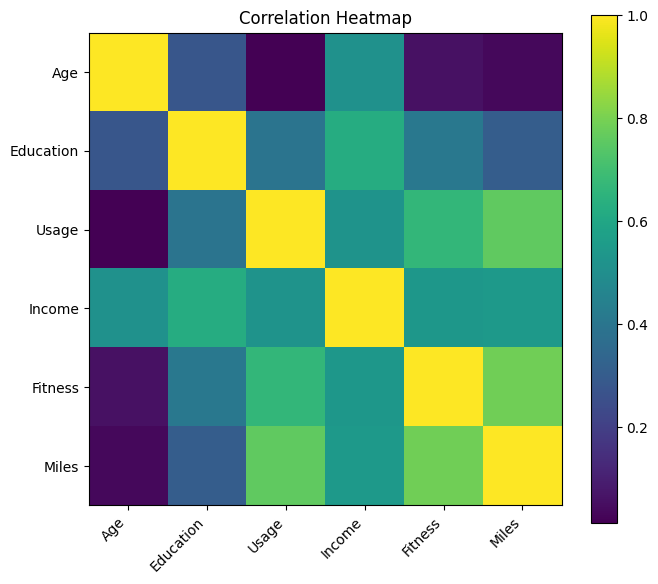

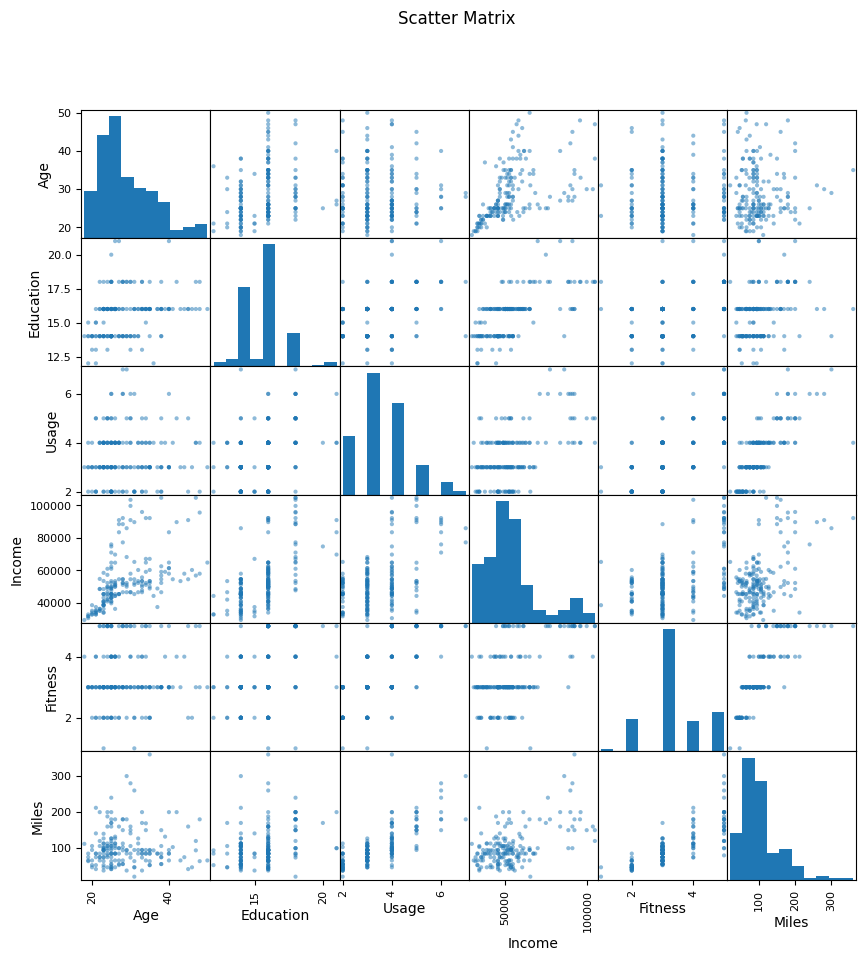

In [32]:
## 9) Correlation Heatmap & Scatter Matrix

num_present = [c for c in num_cl if c in df.columns]
if num_present:
    corr = df[num_present].corr()
    plt.figure(figsize=(7,6))
    plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation Heatmap")
    plt.xticks(range(len(num_present)), num_present, rotation=45, ha="right")
    plt.yticks(range(len(num_present)), num_present)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    # Scatter matrix (pandas) - uses matplotlib under the hood
    pd.plotting.scatter_matrix(df[num_present], figsize=(10,10), diagonal='hist')
    plt.suptitle("Scatter Matrix")
    plt.show()



In [33]:
## 10) Customer Profiling + Business Insights using df

insights = []

# --- Binning Rules ---
if "Age" in df.columns:
    df["AgeBand"] = pd.cut(df["Age"], bins=[0,25,35,50,100], labels=["<=25","26-35","36-50","50+"])
if "Income" in df.columns:
    df["IncomeBand"] = pd.cut(df["Income"], bins=[0,40000,70000,120000,float("inf")], labels=["Low","Mid","Upper-Mid","High"])
if "Usage" in df.columns:
    df["UsageBand"] = pd.cut(df["Usage"], bins=[0,2,4,7,float("inf")], labels=["Light","Moderate","Frequent","Heavy"])
if "Fitness" in df.columns:
    df["FitnessBand"] = pd.cut(df["Fitness"], bins=[0,2,3,4,5,float("inf")], labels=["Very Low","Low","Average","Good","Excellent"])

# --- Columns to include in profiling ---
profile_cols = ["AgeBand","IncomeBand","UsageBand","FitnessBand","Gender","MaritalStatus"]
profile_cols = [c for c in profile_cols if c in df.columns]

# --- Crosstab Analysis ---
if "Product" in df.columns and profile_cols:
    print("Multi-way frequency cube (sparse view):")
    profile = pd.crosstab(df["Product"], [df[c] for c in profile_cols])
    display(profile.head())

    # Share of UsageBand within Product
    if "UsageBand" in df.columns:
        top_usage = pd.crosstab(df["Product"], df["UsageBand"], normalize="index").round(3)
        print("\nShare by UsageBand within each Product (row-normalized):")
        display(top_usage)

# --- Business Insights ---
# Product mix
if "Product" in df.columns:
    prod_share = df["Product"].value_counts(normalize=True)
    insights.append(f"*Product mix:* '{prod_share.idxmax()}' leads with ~{prod_share.max():.1%} share.")

# Gender split
if {"Product","Gender"}.issubset(df.columns):
    tbl = pd.crosstab(df["Product"], df["Gender"], normalize="index")
    insights += [f"For **{p}**, leading gender is **{row.idxmax()}** (~{row.max():.1%})."
                 for p, row in tbl.iterrows()]

# Usage
if {"Product","Usage"}.issubset(df.columns):
    usage_by_prod = df.groupby("Product", observed=True)["Usage"].median()
    insights.append(f"Highest median usage: **{usage_by_prod.idxmax()}** (~{usage_by_prod.max():.1f}/week).")

# Income
if {"Product","Income"}.issubset(df.columns):
    inc_by_prod = df.groupby("Product", observed=True)["Income"].median()
    insights.append(f"Income skews: **{inc_by_prod.idxmin()}** (low) vs **{inc_by_prod.idxmax()}** (high).")

# Fitness
if {"Product","Fitness"}.issubset(df.columns):
    fit_by_prod = df.groupby("Product", observed=True)["Fitness"].median()
    insights.append(f"Fitness levels: **{fit_by_prod.idxmin()}** suits beginners; **{fit_by_prod.idxmax()}** suits advanced.")


# --- Print Insights ---
print("\nKey takeaways:\n")
for line in insights:
    print("-", line)


Multi-way frequency cube (sparse view):


AgeBand            <=25                                                        \
IncomeBand          Low                                                         
UsageBand         Light                                    Moderate             
FitnessBand    Very Low                 Low                Very Low             
Gender           Female      Male    Female          Male    Female      Male   
MaritalStatus Partnered Partnered Partnered Single Single Partnered Partnered   
Product                                                                         
KP281                 1         0         1      1      1         1         2   
KP481                 0         2         0      0      1         0         0   
KP781                 0         0         0      0      0         0         0   

AgeBand                                   ...     36-50                   \
IncomeBand                                ...       Mid                    
UsageBand                                 ...  Moderate                    
FitnessBand         Low                   ...       Low                    
Gender           Female             Male  ...    Female             Male   
MaritalStatus Partnered Single Partnered  ... Partnered Single Partnered   
Product                                   ...                              
KP281                 4      3         1  ...         1      0         6   
KP481                 1      0         2  ...         2      1         2   
KP781                 0      0         0  ...         0      0         0   

AgeBand                                                                     
IncomeBand                             Upper-Mid                            
UsageBand                               Moderate Frequent                   
FitnessBand          Average                Good  Average      Good         
Gender                Female      Male      Male     Male      Male         
MaritalStatus Single  Single Partnered Partnered   Single Partnered Single  
Product                                                                     
KP281              1       1         1         0        0         0      0  
KP481              0       0         0         0        0         0      0  
KP781              0       0         0         2        1         1      2  

[3 rows x 85 columns]


Share by UsageBand within each Product (row-normalized):


UsageBand,Light,Moderate,Frequent
Product,,,
KP281,0.238,0.738,0.025
KP481,0.233,0.717,0.050
KP781,0.000,0.475,0.525



Key takeaways:

- *Product mix:* 'KP281' leads with ~44.4% share.
- For **KP281**, leading gender is **Female** (~50.0%).
- For **KP481**, leading gender is **Male** (~51.7%).
- For **KP781**, leading gender is **Male** (~82.5%).
- Highest median usage: **KP781** (~5.0/week).
- Income skews: **KP281** (low) vs **KP781** (high).
- Fitness levels: **KP281** suits beginners; **KP781** suits advanced.


In [34]:
## 12) Recommendations (Plain-English, Actionable)

recs = [
    "Feature KP781 in premium placements; push financing/EMIs to reduce sticker shock.",
    "Bundle KP281 with beginner programs and 'first 30 days' coaching to reduce churn/returns.",
    "For KP481, target 'returning-to-fitness' customers with moderate goals; offer trade-up path to KP781.",
    "Segment email creatives by gender & usage-intent; highlight durability and noise-level for heavy-use segments.",
    "Run regional price tests for KP281 in lower-income clusters; evaluate elasticity without margin erosion.",
    "Upsell accessories: floor mats, lubricants, maintenance plans—especially for high-usage cohorts.",
    "Refine in-store scripts: ask 3 questions (weekly usage, target miles, fitness level) to map to product quickly.",
]
for i,r in enumerate(recs,1):
    print(f"{i}. {r}")


1. Feature KP781 in premium placements; push financing/EMIs to reduce sticker shock.
2. Bundle KP281 with beginner programs and 'first 30 days' coaching to reduce churn/returns.
3. For KP481, target 'returning-to-fitness' customers with moderate goals; offer trade-up path to KP781.
4. Segment email creatives by gender & usage-intent; highlight durability and noise-level for heavy-use segments.
5. Run regional price tests for KP281 in lower-income clusters; evaluate elasticity without margin erosion.
6. Upsell accessories: floor mats, lubricants, maintenance plans—especially for high-usage cohorts.
7. Refine in-store scripts: ask 3 questions (weekly usage, target miles, fitness level) to map to product quickly.
